In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

In [3]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from fbm.sim import cholesky
from fbm.testing.chi_square import fBm_chi_square_test

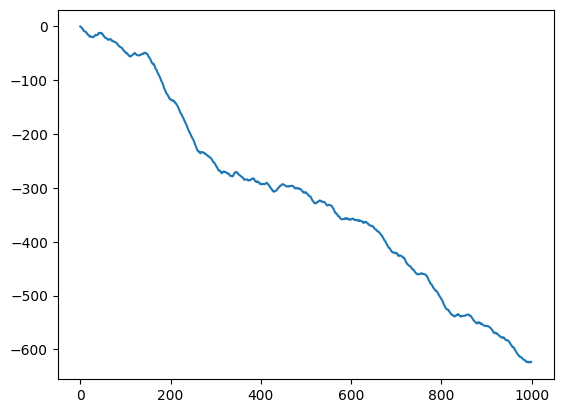

In [61]:
size = 1000
fbm_gen = cholesky.CholeskyFBmGenerator()

# for i in range(100):
plt.plot(range(size), fbm_gen.generate_fBm(H=0.9, size=size))
plt.show()

In [5]:

contribution = np.zeros((size+1, size+1))

for i in range(size):
    contribution[i][:i+1] = fbm_gen.get_Li(i)
    contribution[i] = np.abs(contribution[i])
contribution = np.ma.masked_where(contribution == 0, contribution)

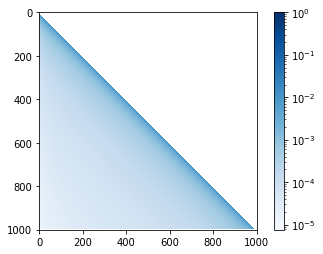

In [6]:
from matplotlib import colors
cmap = plt.cm.get_cmap("Blues").copy()
cmap.set_bad(color='white')

plt.imshow(contribution, cmap=cmap, norm=colors.LogNorm())
plt.title("Absolute values of L(1000) of H=0.3")
plt.colorbar()
plt.show()

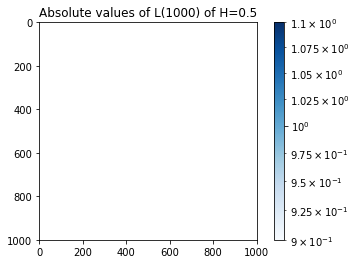

In [11]:
fbm_gen.generate_fBm(H=0.5, size=size)
contribution = np.zeros((size+1, size+1))

for i in range(size):
    contribution[i][:i+1] = fbm_gen.get_Li(i)
    # contribution[i] = np.abs(contribution[i])
contribution = np.ma.masked_where(contribution == 0, contribution)
cmap = plt.cm.get_cmap("Blues").copy()
cmap.set_bad(color='white')

plt.imshow(contribution, cmap=cmap, norm=colors.LogNorm())
plt.title("Absolute values of L(1000) of H=0.5")
plt.colorbar()
plt.show()

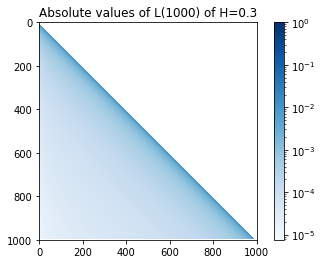

In [12]:
fbm_gen.generate_fBm(H=0.3, size=size)
contribution = np.zeros((size+1, size+1))

for i in range(size):
    contribution[i][:i+1] = fbm_gen.get_Li(i)
    contribution[i] = np.abs(contribution[i])
contribution = np.ma.masked_where(contribution == 0, contribution)
cmap = plt.cm.get_cmap("Blues").copy()
cmap.set_bad(color='white')

plt.imshow(contribution, cmap=cmap, norm=colors.LogNorm())
plt.title("Absolute values of L(1000) of H=0.3")
plt.colorbar()
plt.show()

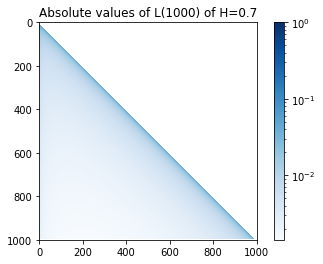

In [13]:
fbm_gen.generate_fBm(H=0.7, size=size)
contribution = np.zeros((size+1, size+1))

for i in range(size):
    contribution[i][:i+1] = fbm_gen.get_Li(i)
    contribution[i] = np.abs(contribution[i])
contribution = np.ma.masked_where(contribution == 0, contribution)
cmap = plt.cm.get_cmap("Blues").copy()
cmap.set_bad(color='white')

plt.imshow(contribution, cmap=cmap, norm=colors.LogNorm())
plt.title("Absolute values of L(1000) of H=0.7")
plt.colorbar()
plt.show()

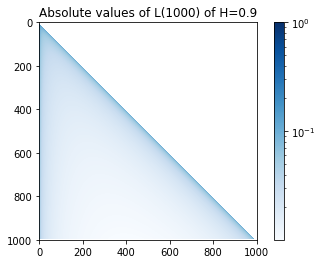

In [14]:
fbm_gen.generate_fBm(H=0.9, size=size)
contribution = np.zeros((size+1, size+1))

for i in range(size):
    contribution[i][:i+1] = fbm_gen.get_Li(i)
    contribution[i] = np.abs(contribution[i])
contribution = np.ma.masked_where(contribution == 0, contribution)
cmap = plt.cm.get_cmap("Blues").copy()
cmap.set_bad(color='white')

plt.imshow(contribution, cmap=cmap, norm=colors.LogNorm())
plt.title("Absolute values of L(1000) of H=0.9")
plt.colorbar()
plt.show()

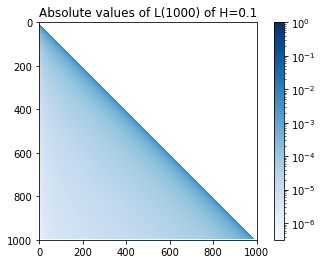

In [15]:
fbm_gen.generate_fBm(H=0.1, size=size)
contribution = np.zeros((size+1, size+1))

for i in range(size):
    contribution[i][:i+1] = fbm_gen.get_Li(i)
    contribution[i] = np.abs(contribution[i])
contribution = np.ma.masked_where(contribution == 0, contribution)
cmap = plt.cm.get_cmap("Blues").copy()
cmap.set_bad(color='white')

plt.imshow(contribution, cmap=cmap, norm=colors.LogNorm())
plt.title("Absolute values of L(1000) of H=0.1")
plt.colorbar()
plt.show()

In [17]:
contributions = dict()
contributions['0.1'] = np.zeros((size+1, size+1))
contributions['0.3'] = np.zeros((size+1, size+1))
contributions['0.7'] = np.zeros((size+1, size+1))
contributions['0.9'] = np.zeros((size+1, size+1))

def assign_contribution(H, s):
    fbm_gen.generate_fBm(H=H, size=size)
    for i in range(size):
        contributions[s][i][:i+1] = fbm_gen.get_Li(i)
        contributions[s][i] = np.abs(contributions[s][i])
    contributions[s] = np.ma.masked_where(contributions[s] == 0, contributions[s])

assign_contribution(0.1, '0.1')
assign_contribution(0.3, '0.3')
assign_contribution(0.7, '0.7')
assign_contribution(0.9, '0.9')

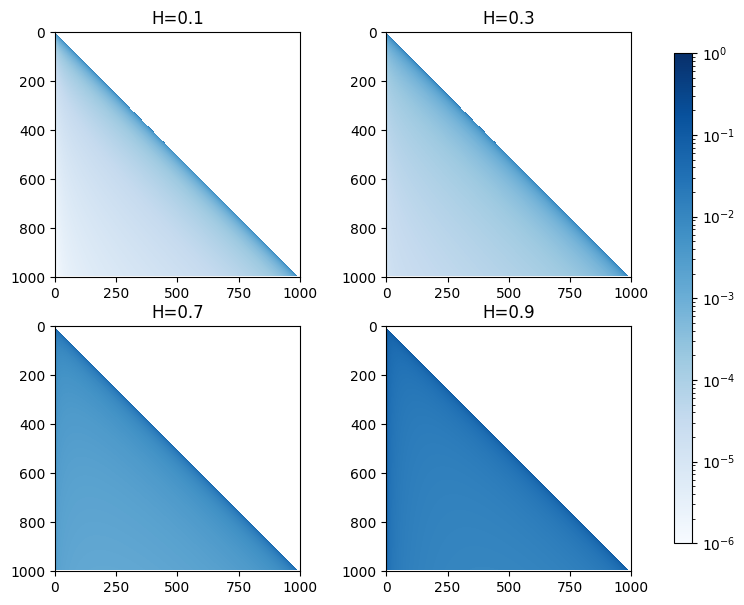

In [59]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9,7))

cmap = plt.cm.get_cmap("Blues").copy()
cmap.set_bad(color='white')

axes[0,0].set_title("H=0.1")
im0 = axes[0,0].imshow(contributions['0.1'], cmap=cmap, norm=colors.LogNorm(vmin=0.000001, vmax=1))
axes[0,1].set_title("H=0.3")
im1 = axes[0,1].imshow(contributions['0.3'], cmap=cmap, norm=colors.LogNorm(vmin=0.000001, vmax=1))
axes[1,0].set_title("H=0.7")
im2 = axes[1,0].imshow(contributions['0.7'], cmap=cmap, norm=colors.LogNorm(vmin=0.000001, vmax=1))
axes[1,1].set_title("H=0.9")
im3 = axes[1,1].imshow(contributions['0.9'], cmap=cmap, norm=colors.LogNorm(vmin=0.000001, vmax=1))

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.83, 0.15, 0.02, 0.7])
fig.colorbar(im3, cax=cbar_ax)
plt.show()
